# Part -1 Logistic Regression

**Step 1 : Import Required libraries**

In [1]:
# Pandas and Numpy Libraries

import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Step 2 : Read, Pre-Process and Print the main statistics about the dataset**

In [3]:
# Reading given datafile

Penguins_Data = pd.read_csv("penguins.csv")

df = pd.DataFrame(Penguins_Data)

print(df)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0  

In [4]:
# Statistics about the dataset

print(df.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000  


In [5]:
# Pre-Processing the data

# Data before removing NAN Values

print("Data before removing")

print(df)

# Data after removing NAN Values

print("Data after removing")

Penguins_Data.dropna(axis=0,inplace=True)

Penguins_Data

Data before removing
       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [6]:
Penguins_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [7]:
Penguins_Data['year'].value_counts()

2009    117
2008    113
2007    103
Name: year, dtype: int64

**Step 3: Converting string data type to categorical features**

In [8]:
## Assigning values to each different value 

Species_Column = {'Adelie':0,'gentoo':1,'Chinstrap':2}

Penguins_Data['species'] = Penguins_Data['species'].apply(lambda each_value: Species_Column.get(each_value))



Island_Column = {'Torgersen':0,'Biscoe':1,'Dream':2}

Penguins_Data['island'] = Penguins_Data['island'].apply(lambda each_value: Island_Column.get(each_value))


Gender_Column = {'male':0,'female':1}

Penguins_Data['sex'] = Penguins_Data['sex'].apply(lambda each_value: Gender_Column.get(each_value))

year_Column = {2007:0,2008:1,2009:2}

Penguins_Data['year'] = Penguins_Data['year'].apply(lambda each_value: year_Column.get(each_value))


Penguins_Data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0.0,0,39.1,18.7,181.0,3750.0,0,0
1,0.0,0,39.5,17.4,186.0,3800.0,1,0
2,0.0,0,40.3,18.0,195.0,3250.0,1,0
4,0.0,0,36.7,19.3,193.0,3450.0,1,0
5,0.0,0,39.3,20.6,190.0,3650.0,0,0
...,...,...,...,...,...,...,...,...
339,2.0,2,55.8,19.8,207.0,4000.0,0,2
340,2.0,2,43.5,18.1,202.0,3400.0,1,2
341,2.0,2,49.6,18.2,193.0,3775.0,0,2
342,2.0,2,50.8,19.0,210.0,4100.0,0,2


In [9]:
Penguins_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            214 non-null    float64
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
 7   year               333 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 23.4 KB


In [10]:
Penguins_Data['species'] = pd.to_numeric(Penguins_Data['species'], errors='coerce').fillna(0).astype(int)
Penguins_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int32  
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
 7   year               333 non-null    int64  
dtypes: float64(4), int32(1), int64(3)
memory usage: 22.1 KB


In [11]:
Penguins_Data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,0,39.1,18.7,181.0,3750.0,0,0
1,0,0,39.5,17.4,186.0,3800.0,1,0
2,0,0,40.3,18.0,195.0,3250.0,1,0
4,0,0,36.7,19.3,193.0,3450.0,1,0
5,0,0,39.3,20.6,190.0,3650.0,0,0
...,...,...,...,...,...,...,...,...
339,2,2,55.8,19.8,207.0,4000.0,0,2
340,2,2,43.5,18.1,202.0,3400.0,1,2
341,2,2,49.6,18.2,193.0,3775.0,0,2
342,2,2,50.8,19.0,210.0,4100.0,0,2


**Step4:Normalizing non-categorical features**

In [12]:
Penguins_Data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,0,39.1,18.7,181.0,3750.0,0,0
1,0,0,39.5,17.4,186.0,3800.0,1,0
2,0,0,40.3,18.0,195.0,3250.0,1,0
4,0,0,36.7,19.3,193.0,3450.0,1,0
5,0,0,39.3,20.6,190.0,3650.0,0,0


In [13]:
normal_cols_data = Penguins_Data.iloc[:,2:6]
normal_cols_data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0


In [14]:
df_normalized = (normal_cols_data - normal_cols_data.min()) / (normal_cols_data.max() - normal_cols_data.min())
df_normalized

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
4,0.167273,0.738095,0.355932,0.208333
5,0.261818,0.892857,0.305085,0.263889
...,...,...,...,...
339,0.861818,0.797619,0.593220,0.361111
340,0.414545,0.595238,0.508475,0.194444
341,0.636364,0.607143,0.355932,0.298611
342,0.680000,0.702381,0.644068,0.388889


In [15]:
Penguins_Data.iloc[:,[0,1,6,7]]

,species,island,sex,year
0,0,0,0,0
1,0,0,1,0
2,0,0,1,0
4,0,0,1,0
5,0,0,0,0
...,...,...,...,...
339,2,2,0,2
340,2,2,1,2
341,2,2,0,2
342,2,2,0,2


In [16]:
Penguins_Data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,0,39.1,18.7,181.0,3750.0,0,0
1,0,0,39.5,17.4,186.0,3800.0,1,0
2,0,0,40.3,18.0,195.0,3250.0,1,0
4,0,0,36.7,19.3,193.0,3450.0,1,0
5,0,0,39.3,20.6,190.0,3650.0,0,0


In [17]:
final_data = pd.concat([Penguins_Data.iloc[:,[0,1,6,7]], df_normalized], axis=1)
final_data

,species,island,sex,year,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,0,0,0,0.254545,0.666667,0.152542,0.291667
1,0,0,1,0,0.269091,0.511905,0.237288,0.305556
2,0,0,1,0,0.298182,0.583333,0.389831,0.152778
4,0,0,1,0,0.167273,0.738095,0.355932,0.208333
5,0,0,0,0,0.261818,0.892857,0.305085,0.263889
...,...,...,...,...,...,...,...,...
339,2,2,0,2,0.861818,0.797619,0.593220,0.361111
340,2,2,1,2,0.414545,0.595238,0.508475,0.194444
341,2,2,0,2,0.636364,0.607143,0.355932,0.298611
342,2,2,0,2,0.680000,0.702381,0.644068,0.388889


In [18]:
final_data.shape

(333, 8)

In [19]:
type(Penguins_Data)

pandas.core.frame.DataFrame

In [20]:
data_mat=np.array(final_data)

In [21]:
type(data_mat)

numpy.ndarray

In [22]:
data_mat

array([[0.        , 0.        , 0.        , ..., 0.66666667, 0.15254237,
        0.29166667],
       [0.        , 0.        , 1.        , ..., 0.51190476, 0.23728814,
        0.30555556],
       [0.        , 0.        , 1.        , ..., 0.58333333, 0.38983051,
        0.15277778],
       ...,
       [2.        , 2.        , 0.        , ..., 0.60714286, 0.3559322 ,
        0.29861111],
       [2.        , 2.        , 0.        , ..., 0.70238095, 0.6440678 ,
        0.38888889],
       [2.        , 2.        , 1.        , ..., 0.66666667, 0.44067797,
        0.29861111]])

In [23]:
final_data.head()

,species,island,sex,year,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,0,0,0,0.254545,0.666667,0.152542,0.291667
1,0,0,1,0,0.269091,0.511905,0.237288,0.305556
2,0,0,1,0,0.298182,0.583333,0.389831,0.152778
4,0,0,1,0,0.167273,0.738095,0.355932,0.208333
5,0,0,0,0,0.261818,0.892857,0.305085,0.263889


- **Step5: Choosing 'sex' column as target**
- **Step6: Creating the data matrices for X (input) and Y (target) in a shape,X = 𝑁 x 𝑑 and
Y = 𝑁 x 1, were 𝑁 is a number of data samples and 𝑑 has a number of features**
- **Step7: Dividing the dataset into training and test, as 80% training,20% testing dataset.**

In [24]:
np.random.seed(263503)
sampled_row_indices = np.random.choice(data_mat.shape[0], size=data_mat.shape[0], replace=True)
sampled_row_indices

array([192,  64,  10,  77, 151, 173,  40, 142,  36, 191, 305, 189, 183,
        41, 181, 294, 215, 131,  80, 254, 120, 271, 186, 210,  48, 292,
       177, 174, 327, 257,  16, 228, 273, 279, 128, 140, 180, 220,  84,
        99, 103, 172, 163,  19, 173, 104, 142, 234, 332, 184, 176, 310,
       153, 160, 109, 199,  74, 117, 188, 107, 277, 167, 314, 261, 256,
       109, 294,  78, 251, 292, 163, 181,  60, 273, 267,  37,  91, 286,
        58,  81, 132, 293, 178, 178, 292,  76, 166, 299,  60, 274,  82,
       276,  88, 321,  62,  22,  29,  30, 306, 175,  86, 282, 298, 193,
       262, 114, 165, 266, 221, 258, 146, 111, 248, 116, 133, 331, 293,
       172, 219, 260, 144, 329,  37, 150, 158, 117, 132, 322, 144, 196,
       229, 133, 278, 171,  18, 115, 107, 310,   0,  68, 330, 323, 265,
        36, 235, 313, 278, 233, 211, 213, 211,  83, 218, 309,  61, 161,
        89,  63,  83, 223, 314, 291, 166, 101, 290, 323, 103, 290, 200,
       297, 317, 282, 323,  45, 325, 192, 232,  37, 266, 238, 30

In [25]:
final_data.head()

,species,island,sex,year,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,0,0,0,0.254545,0.666667,0.152542,0.291667
1,0,0,1,0,0.269091,0.511905,0.237288,0.305556
2,0,0,1,0,0.298182,0.583333,0.389831,0.152778
4,0,0,1,0,0.167273,0.738095,0.355932,0.208333
5,0,0,0,0,0.261818,0.892857,0.305085,0.263889


In [26]:
X = data_mat[:,[0,1,3,4,5,6,7]]
X

array([[0.        , 0.        , 0.        , ..., 0.66666667, 0.15254237,
        0.29166667],
       [0.        , 0.        , 0.        , ..., 0.51190476, 0.23728814,
        0.30555556],
       [0.        , 0.        , 0.        , ..., 0.58333333, 0.38983051,
        0.15277778],
       ...,
       [2.        , 2.        , 2.        , ..., 0.60714286, 0.3559322 ,
        0.29861111],
       [2.        , 2.        , 2.        , ..., 0.70238095, 0.6440678 ,
        0.38888889],
       [2.        , 2.        , 2.        , ..., 0.66666667, 0.44067797,
        0.29861111]])

In [27]:
y = data_mat[:,2]
y

array([0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [28]:
split_point = int(0.8*len(sampled_row_indices))
split_point

266

In [29]:
X_train = X[sampled_row_indices[:split_point]]
y_train = y[sampled_row_indices[:split_point]]
X_test = X[sampled_row_indices[split_point:]]
y_test = y[sampled_row_indices[split_point:]]

**Step8: Printing X_train, y_train, X_test, y_test**

In [30]:
X_train

array([[0.        , 1.        , 1.        , ..., 0.33333333, 0.89830508,
        0.75      ],
       [0.        , 0.        , 1.        , ..., 0.70238095, 0.30508475,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.55952381, 0.22033898,
        0.27777778],
       ...,
       [2.        , 2.        , 2.        , ..., 0.70238095, 0.49152542,
        0.34722222],
       [0.        , 1.        , 2.        , ..., 0.07142857, 0.71186441,
        0.61805556],
       [0.        , 0.        , 2.        , ..., 0.70238095, 0.45762712,
        0.36111111]])

In [35]:
X_train.shape

(266, 7)

In [31]:
y_train

array([0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [36]:
y_train.shape

(266,)

In [32]:
X_test

array([[0.        , 0.        , 0.        , 0.25454545, 0.66666667,
        0.15254237, 0.29166667],
       [0.        , 0.        , 2.        , 0.32727273, 0.6547619 ,
        0.28813559, 0.17361111],
       [0.        , 1.        , 2.        , 0.32363636, 0.82142857,
        0.52542373, 0.5625    ],
       [2.        , 2.        , 2.        , 0.47636364, 0.41666667,
        0.3220339 , 0.15277778],
       [0.        , 1.        , 2.        , 0.36727273, 0.76190476,
        0.42372881, 0.4375    ],
       [0.        , 0.        , 1.        , 0.16727273, 0.67857143,
        0.25423729, 0.30555556],
       [0.        , 1.        , 0.        , 0.22181818, 0.5952381 ,
        0.22033898, 0.34722222],
       [0.        , 0.        , 2.        , 0.29454545, 0.46428571,
        0.06779661, 0.20833333],
       [0.        , 2.        , 2.        , 0.19636364, 0.64285714,
        0.45762712, 0.49305556],
       [2.        , 2.        , 0.        , 0.50909091, 0.60714286,
        0.10169492, 0.1

In [37]:
X_test.shape

(67, 7)

In [38]:
y_test

array([0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.])

In [39]:
y_test.shape

(67,)

In [40]:
def accuracy(y_true,y_hat):
    acc = np.mean(y_true==y_hat)
    return acc

**Step9: Building a Logistic regression class**

In [42]:
class LogiisticRegression():
    def __init__(self, learning_rate = 1e-3,num_iterations = 100000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias_weight = None
        
    def sigmoid(self,x):
        value = 1/(1+np.exp(-x))
        return value
    
    
    def gradient_descent(self, x):
        pred = self.sigmoid(x)
        delta = pred - self.y_train
        
        dW = (1/self.n_rows)*(np.dot(self.X_train.T,delta))
        dB = np.sum(delta)/self.n_rows
        
        return dW,dB
        
    def cost(self,x):
        
        jW = -1/self.n_rows * np.sum(self.y_train*np.log(x) + (1-self.y_train)*np.log(1-x))
        
        return jW
        
        
    def fit(self, X,y):
        self.n_rows, self.n_features = X.shape
        self.X_train = X
        self.y_train = y
        
        np.random.seed(28479)
        self.weights = np.random.uniform(0, 1,size= self.n_features)
        self.bias_weight = np.random.rand()
        self.loss = []
        
        for i in range(self.num_iterations):
            logistic_regressor = np.dot(self.X_train,self.weights.T) + self.bias_weight
            
            dWeights,dBiasWeights = self.gradient_descent(logistic_regressor)
            
            jWeights = self.cost(self.sigmoid(logistic_regressor))

            self.loss.append(jWeights)
            
            self.weights = self.weights - self.learning_rate*dWeights
            
            self.bias_weight = self.bias_weight - self.learning_rate*dBiasWeights
            
    def predict(self,x):
        self.X_test = x
        y_hat = self.sigmoid(np.dot(self.X_test,self.weights.T) + self.bias_weight)
        
        pred_result = np.zeros_like(y_hat)
        pred_result[y_hat >= 0.5] = 1
        
        return pred_result

**Step10: Training the model with different learning rates and number of iterations**

In [43]:
model1 = LogiisticRegression()
model1.fit(X_train,y_train)

In [44]:
pred = model1.predict(X_test)

In [45]:
print('Accuracy for Model 1:',accuracy(y_test,pred)*100)

Accuracy for Model 1: 82.08955223880598


In [46]:
model2 = LogiisticRegression(learning_rate=0.001,num_iterations=10000)
model2.fit(X_train,y_train)

In [47]:
pred = model2.predict(X_test)

In [48]:
print('Accuracy for Model 2:',accuracy(y_test,pred)*100)

Accuracy for Model 2: 55.223880597014926


In [49]:
model3 = LogiisticRegression(learning_rate=0.01,num_iterations=200000)
model3.fit(X_train,y_train)

In [50]:
pred = model3.predict(X_test)

In [51]:
print('Accuracy for Model 3:',accuracy(y_test,pred)*100)

Accuracy for Model 3: 89.55223880597015


### References:

- https://www.geeksforgeeks.org/python-pandas-dataframe-astype/
- https://datascience.stackexchange.com/questions/94101/how-do-i-assign-specific-values-to-categorical-variables
- https://stackoverflow.com/questions/71249167/pandas-errors-intcastingnanerror-cannot-convert-non-finite-values-na-or-inf-t
- https://datascienceparichay.com/article/pandas-get-max-value-in-one-or-more-columns/
- https://www.geeksforgeeks.org/how-to-split-data-into-training-and-testing-in-python-without-sklearn/
- https://towardsdatascience.com/logistic-regression-from-scratch-in-python-ec66603592e2

In [45]:
# import pickle
# pickle.dump(model3.weights,open("/Users/rohituddagiri/Documents/CSE 574/model_weights.p","wb"))

In [52]:
model4 = LogiisticRegression(learning_rate=0.01,num_iterations=10)
model4.fit(X_train,y_train)

In [53]:
pred = model4.predict(X_test)

In [54]:
print('Accuracy for Model 3:',accuracy(y_test,pred)*100)

Accuracy for Model 3: 52.23880597014925


In [55]:
model4.loss

[1.6240159677584318,
 1.6118967594537592,
 1.5998523935739257,
 1.5878838598844713,
 1.575992144959845,
 1.5641782314332928,
 1.552443097227738,
 1.5407877147683207,
 1.529213050177319,
 1.5177200624522793]

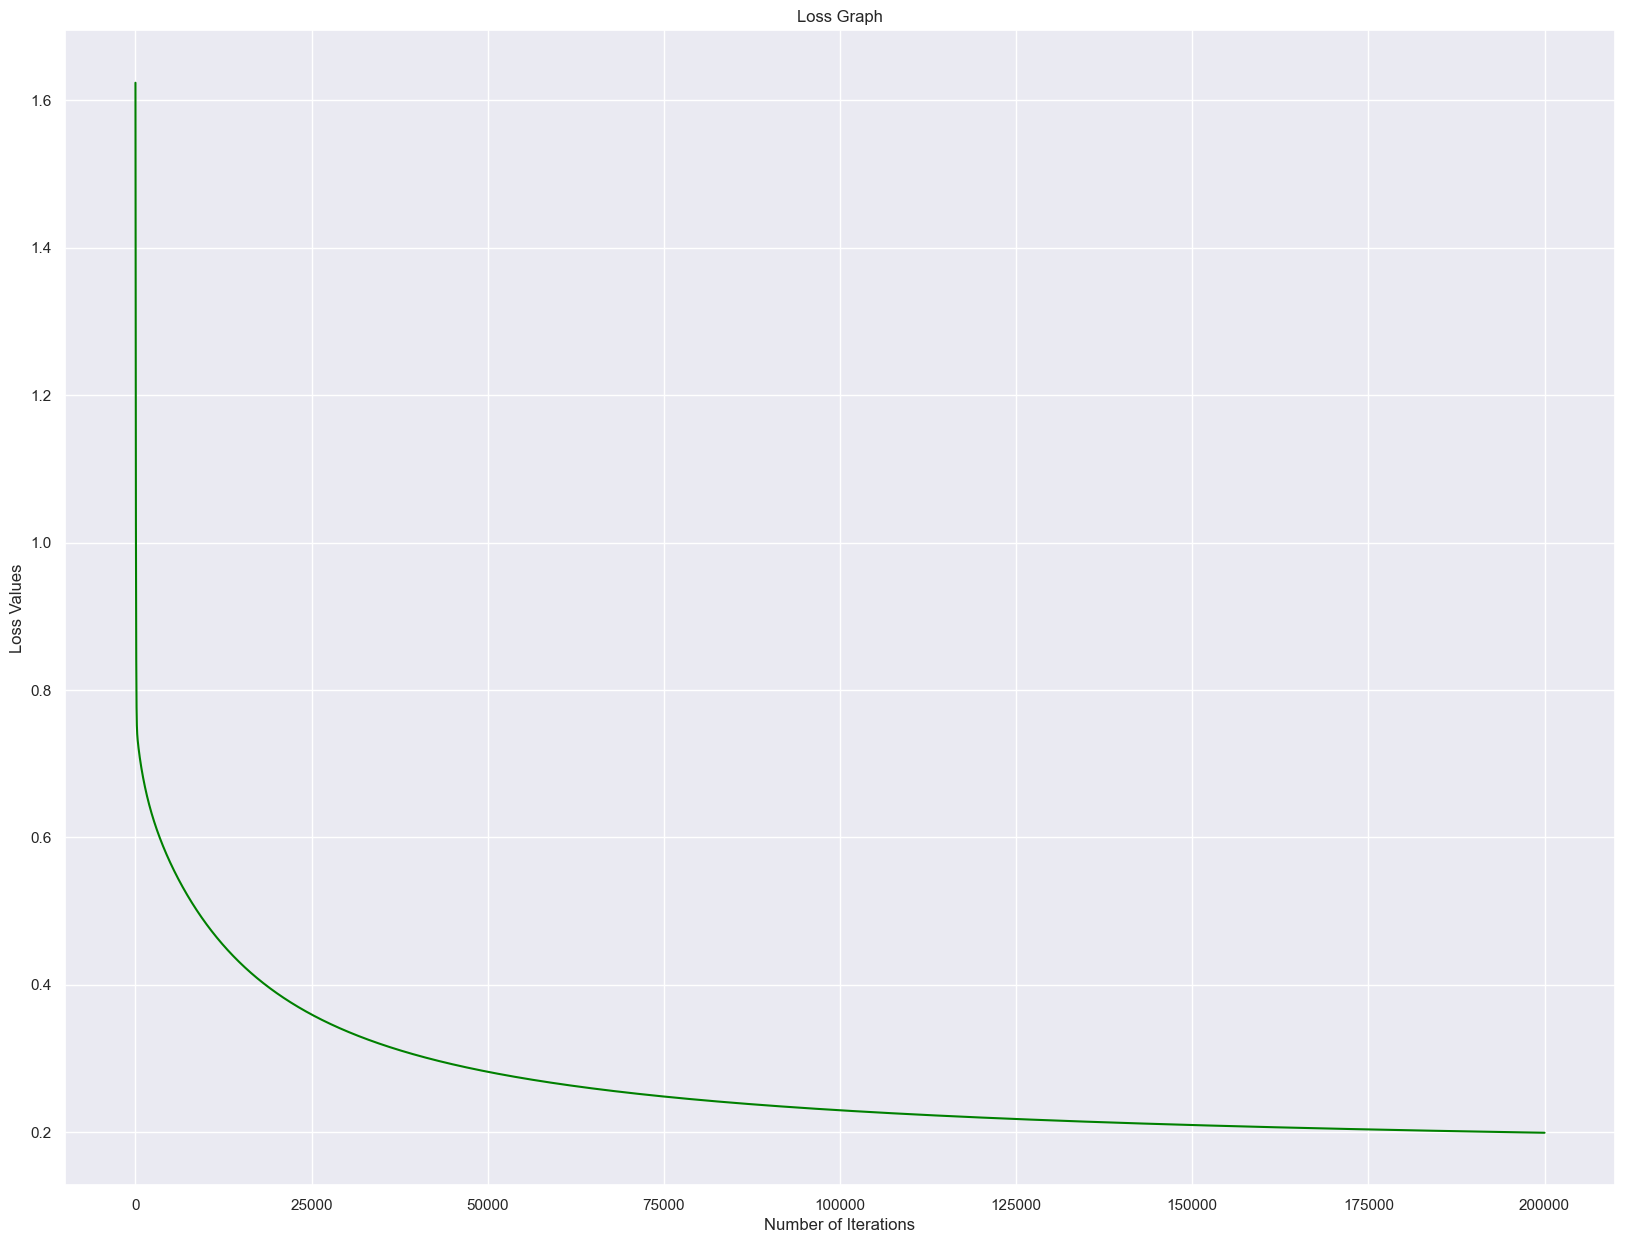

In [70]:
plt.figure(figsize=(20,15))
plt.xlabel("Number of Iterations")
plt.ylabel("Loss Values")
plt.title("Loss Graph")
plt.plot(model3.loss,color="green")
plt.show()

In [56]:
iterations = [10000,100000,200000]
learning_rates = [0.0001,0.001,0.1]

acc_for_constant_lr = []
acc_for_constant_iter = []


for val in iterations:
    model = LogiisticRegression(num_iterations=val) # lr = 0.0001
    model.fit(X_train,y_train)
    
    acc_for_constant_lr.append(accuracy(y_test,model.predict(X_test)))
    

for val in learning_rates:
    model = LogiisticRegression(learning_rate=val) # iter = 100000
    model.fit(X_train,y_train)
    
    acc_for_constant_iter.append(accuracy(y_test,model.predict(X_test)))


print("Constant learning rates:",acc_for_constant_lr)
print("Constant iterations:",acc_for_constant_iter)

Constant learning rates: [0.5522388059701493, 0.8208955223880597, 0.8656716417910447]
Constant iterations: [0.5522388059701493, 0.8208955223880597, 0.8955223880597015]


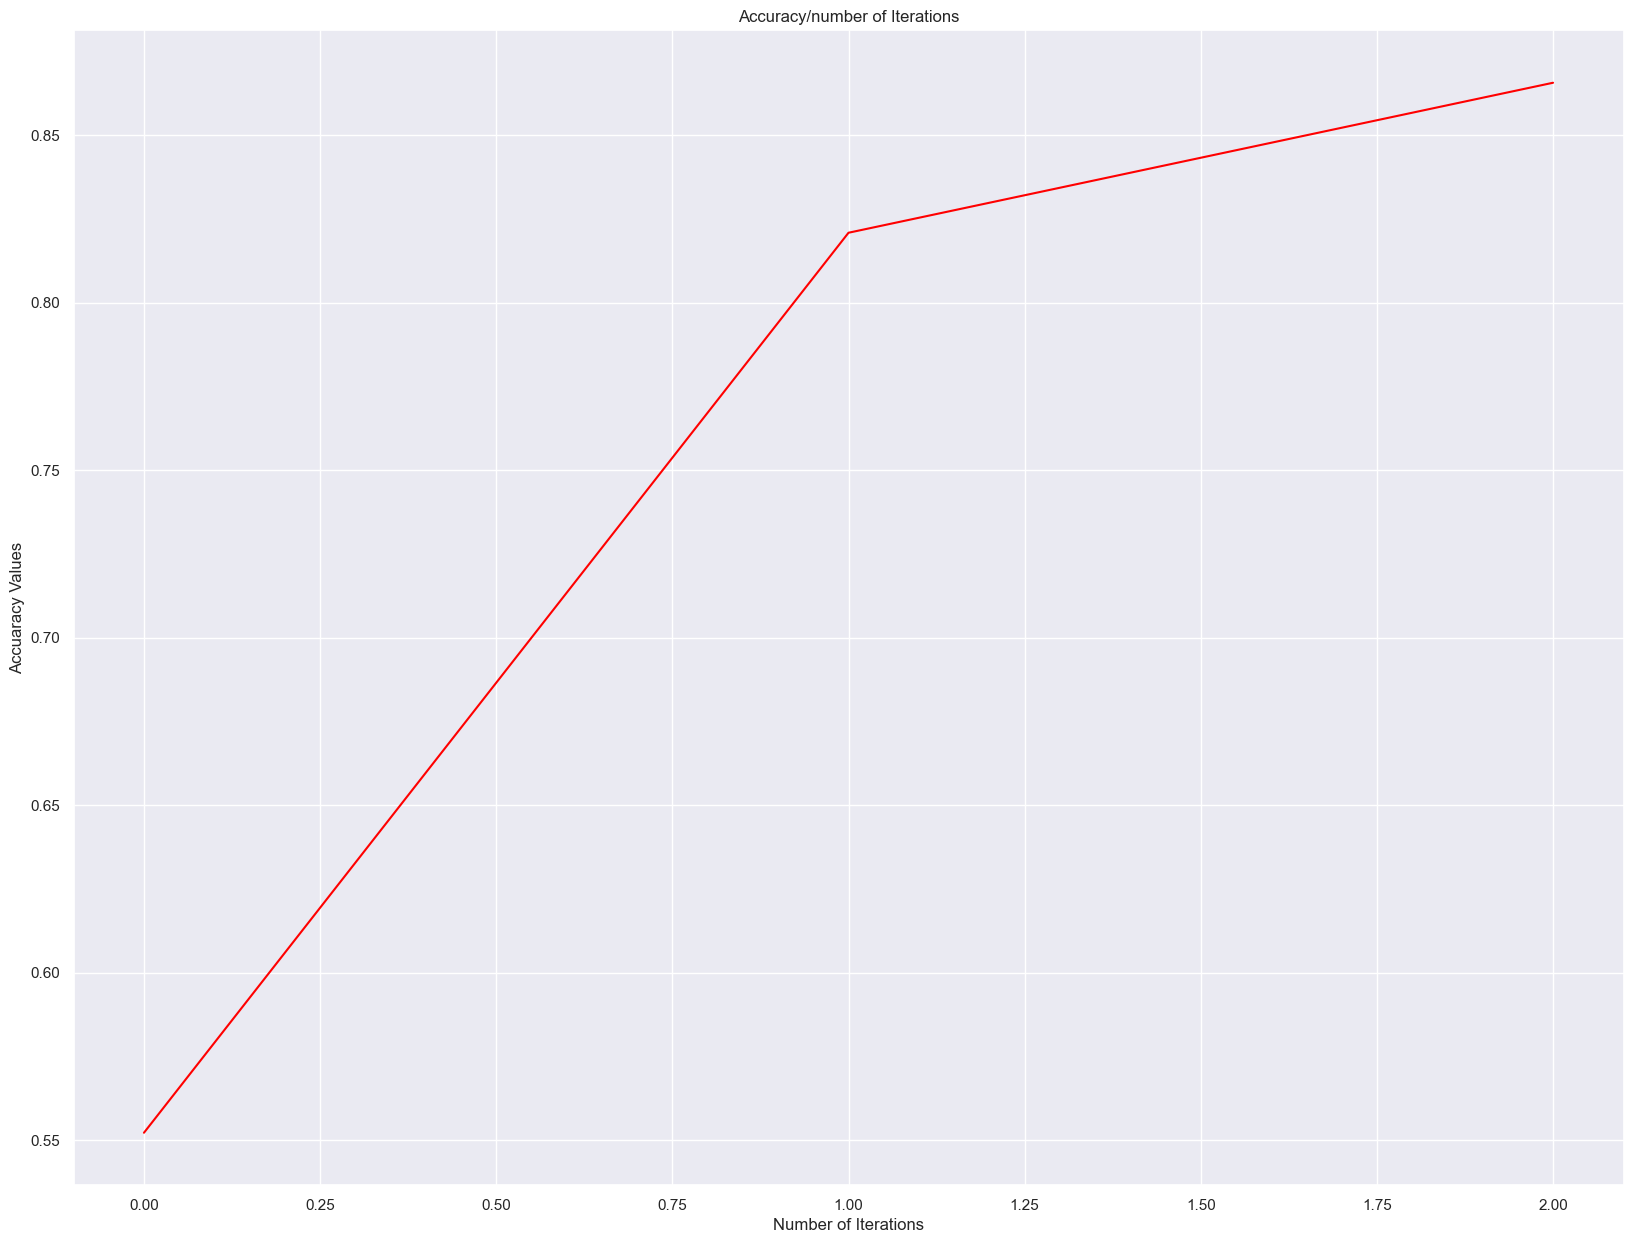

In [71]:
plt.figure(figsize=(20,15))
plt.xlabel("Number of Iterations")
plt.ylabel("Accuaracy Values")
plt.title("Accuracy/number of Iterations")
plt.plot(acc_for_constant_lr,color="red")
plt.show()

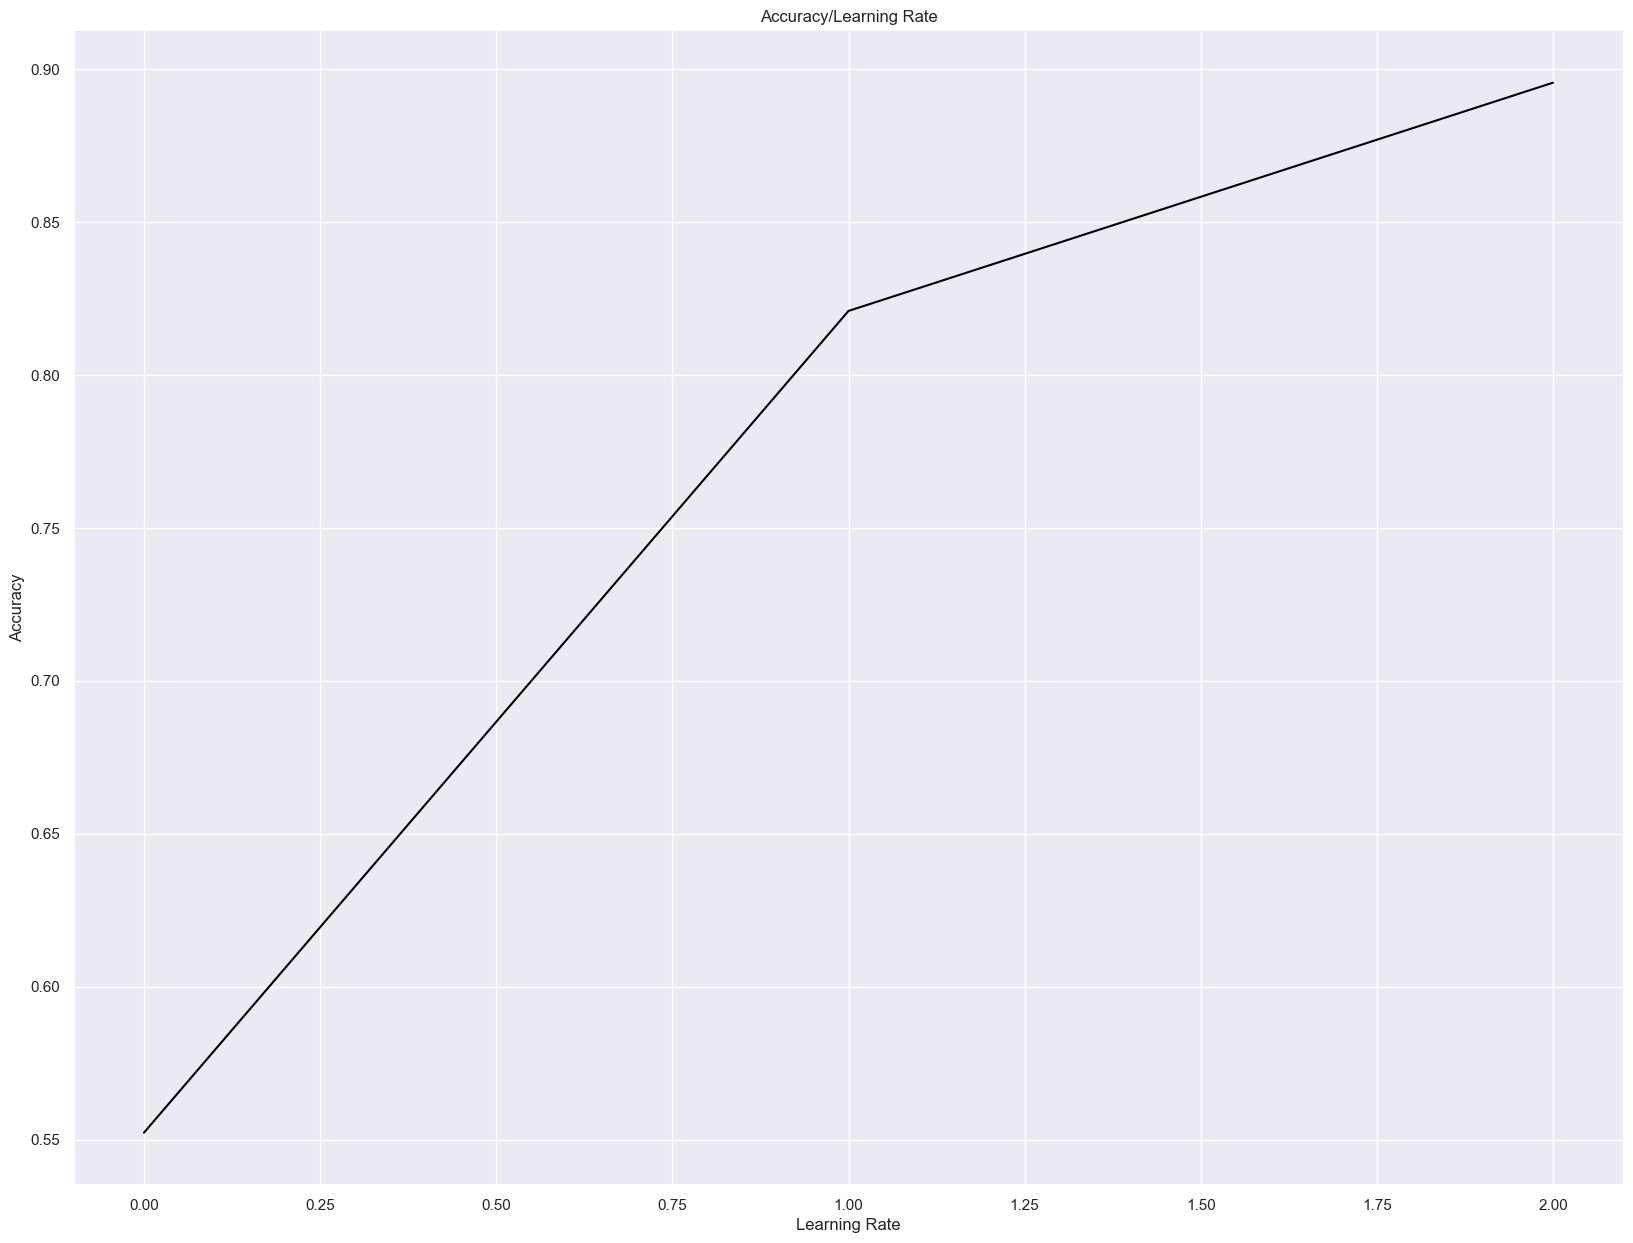

In [72]:
plt.figure(figsize=(20,15))
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Accuracy/Learning Rate")
plt.plot(acc_for_constant_iter,color="black")
plt.show()